## Business Questions

- What day people most likely rent the bike?
- What season people most likely rent the bike and what season the bike is rarely rented?
- What the different between registered and casual customer to rides in seasons, day, and hour?
- How the weather situation that is most riders like to ride?
- How the relationship between number of rides and the temperature feels like?

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
# read the bike sharing data per day
bike_day = pd.read_csv("/content/bike_data_day.csv")
bike_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# read the bike sharing data per hour
bike_hour = pd.read_csv("/content/bike_data_hour.csv")
bike_hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
The bike_hour data is the detailed data of bike_day, because it is included hourly data each day.

### Assessing Data

In [ ]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


There is no "nan" value in each columns. But, the "dteday" format is still "object" so we need to convert it into "date" format to make it easy to analize later. We also can just drop the "instant" column because it is just indicate the index of row.

In [ ]:
# checking statistical parameters
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# check duplicated row
print("Number of duplicated row: ", bike_day.duplicated().sum())

Number of duplicated row:  0


In [ ]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Same as the bike_day data, there is no nan value in the bike_hour data and "dteday" column need to convert.

In [ ]:
# checking statistical parameters
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# check duplicated row
print("Number of duplicated row: ", bike_hour.duplicated().sum())

Number of duplicated row:  0


### Cleaning Data

In [ ]:
# drop the "instant" column in bike_day and bike_hour data as it is only indicate row index
bike_day = bike_day.drop('instant', axis=1)
bike_hour = bike_hour.drop('instant', axis=1)

print(bike_day.columns)
print(bike_hour.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [ ]:
# convert date day for each dataset from "object" into "date" format
bike_day['dteday'] = pd.to_datetime(bike_day['dteday'])
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [ ]:
bike_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [ ]:
# additionally, because some columns are containing normalized data like "temp", "atemp", "hum", "windspeed" columns then we will convert it into the actual data
bike_day['temp'] =  bike_day['temp'] * 41
bike_day['atemp'] = bike_day["atemp"] * 50
bike_day['hum'] = bike_day['hum'] * 100
bike_day['windspeed'] = bike_day['windspeed'] * 67

bike_hour['temp'] =  bike_hour['temp'] * 41
bike_hour['atemp'] = bike_hour["atemp"] * 50
bike_hour['hum'] = bike_hour['hum'] * 100
bike_hour['windspeed'] = bike_hour['windspeed'] * 67

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
bike_day.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


We will focused more into the quantitative data, like the temperature. The average of temperature from entire day is 23.71 Celsius degree. Along with that, temperature feels like have the maximum of 42.04 degree, which is pretty hot right? I wonder that is there any people that is rent the bike on that temperature, let's dig in!

In [ ]:
rides_at_40_degrees = bike_day[(bike_day['atemp'] >= 40.00) & (bike_day['atemp'] <= 42.04)]
print("Number of rides on temperature between 40.00 - 42.04 Celsius degree", rides_at_40_degrees['cnt'].sum())

Number of rides on temperature between 40.00 - 42.04 Celsius degree 11909


Surprisingly there are a lot of people that is rides with > 40 C degree temperature.

In [ ]:
# The total number of rides in every season
bike_day.groupby(by="season").cnt.sum()

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


People most likely ride in the fall season, and more lessly ride in the spring season

In [ ]:
bike_day.groupby(by="weathersit").cnt.sum()

,cnt
weathersit,
1,2257952
2,996858
3,37869


People like to rides when it is clear outside, and not likely to ride when there is a heavy snow or rain.

In [ ]:
# check the total rides between 2011 and 2012
bike_day.groupby(by="yr").cnt.sum()

,cnt
yr,
0,1243103
1,2049576


There are increasing number of rider from 2011 to 2012, seems like people more and more likely to rides.

In [ ]:
bike_hour.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
})

,casual,registered
holiday,,
0,597658,2616586
1,22359,56076


As expected, many casual riders are rides in the holiday rather than in weekday. Registered people do the same, but registered people also have more rider than casual people on weekday. It may because, registered people use the bike to commute in their work days.

## Visualization & Explanatory Analysis

### In what day people most likely rent the bike?

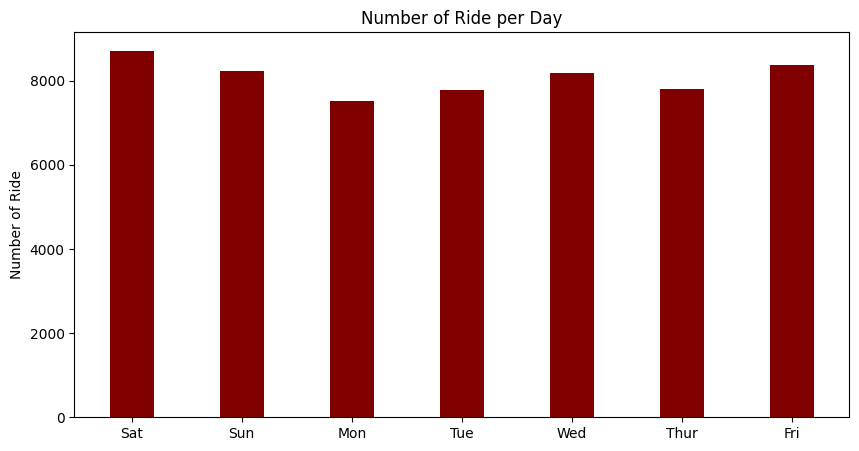

In [ ]:
# renaming week day label
bike_day['weekday'] = bike_day['weekday'].astype('category')
bike_day['weekday'] = bike_day['weekday'].cat.rename_categories({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thur", 5: "Fri", 6: "Sat"})

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(bike_day['weekday'], bike_day['cnt'], color ='maroon',
        width = 0.4)

plt.ylabel("Number of Ride")
plt.title("Number of Ride per Day")
plt.show()

While bike rentals are relatively consistent throughout the week, rentals peak on Saturdays, likely as more casual riders opt to use bikes for leisure on weekends.

### In what season people most likely rent the bike and what season the bike is rarely rented?

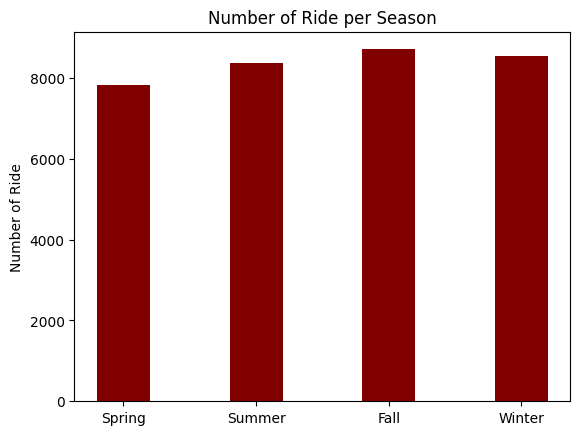

In [ ]:
# renaming the seasons
bike_day['season'] = bike_day['season'].astype('category')
bike_day['season'] = bike_day['season'].cat.rename_categories({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# creating the bar plot
plt.bar(bike_day['season'], bike_day['cnt'], color ='maroon',
        width = 0.4)

plt.ylabel("Number of Ride")
plt.title("Number of Ride per Season")
plt.show()

Fall is the most popular season for bike rentals, as the mild and pleasant weather encourages outdoor activities. Conversely, Spring sees the lowest rentals, potentially due to less favorable weather conditions.

### What the different between registered and casual customer to rides in seasons, day, and hour?

<ipython-input-24-4a5c8dada3e2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_data = bike_day.groupby('season')[['casual', 'registered']].sum()


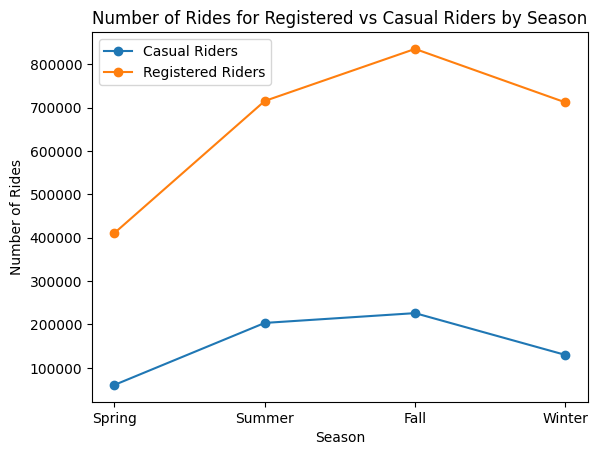

In [ ]:
# group it by seasonal
seasonal_data = bike_day.groupby('season')[['casual', 'registered']].sum()

# plot with line plot
plt.plot(seasonal_data.index, seasonal_data['casual'], marker='o', label='Casual Riders')
plt.plot(seasonal_data.index, seasonal_data['registered'], marker='o', label='Casual Riders')

plt.xlabel("Season")
plt.ylabel("Number of Rides")
plt.title("Number of Rides for Registered vs Casual Riders by Season")
plt.legend(["Casual Riders", "Registered Riders"])
plt.show()

Same as the chart before, both registered and casual people are like to rides in Fall season and is not too like to ride in Spring season.

<ipython-input-29-e51073607649>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_data = bike_day.groupby('weekday')[['casual', 'registered']].sum()


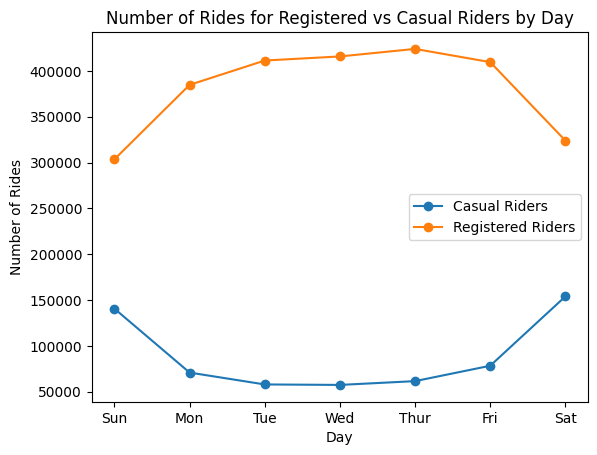

In [ ]:
# group it by day
seasonal_data = bike_day.groupby('weekday')[['casual', 'registered']].sum()

# plot with line plot
plt.plot(seasonal_data.index, seasonal_data['casual'], marker='o', label='Casual Riders')
plt.plot(seasonal_data.index, seasonal_data['registered'], marker='o', label='Casual Riders')

plt.xlabel("Day")
plt.ylabel("Number of Rides")
plt.title("Number of Rides for Registered vs Casual Riders by Day")
plt.legend(["Casual Riders", "Registered Riders"])
plt.show()

It is shows that casual people are like to ride on weekend rather than weekday. Vice versa with the registered people that is may used the bike to commute to work are have many riders in the weekday.

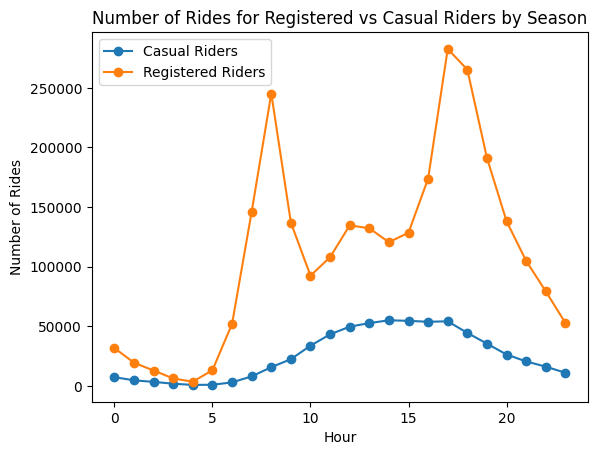

<Figure size 1200x600 with 0 Axes>

In [ ]:
# group it by hour
seasonal_data = bike_hour.groupby('hr')[['casual', 'registered']].sum()

# plot with line plot
plt.plot(seasonal_data.index, seasonal_data['casual'], marker='o', label='Casual Riders')
plt.plot(seasonal_data.index, seasonal_data['registered'], marker='o', label='Casual Riders')

plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.title("Number of Rides for Registered vs Casual Riders by Season")
plt.legend(["Casual Riders", "Registered Riders"])
plt.figure(figsize = (12, 6))
plt.show()

It is shows that, for the registered rider, in the morning, mid of the day, and evening the number of user are increase. This may indicate that the users are use it to start to work, go to lunch, and back to home.

But, for the casual rider, it is increase in the range of 10-17 hour. This may indicate that people in casual rides is used the bike to relax or chill.

### How the weather situation that is most riders like to ride?

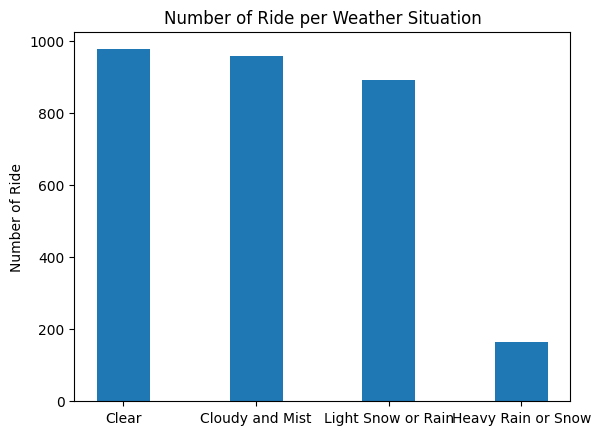

In [ ]:
bike_hour['weathersit'] = bike_hour['weathersit'].astype('category')
bike_hour['weathersit'] = bike_hour['weathersit'].cat.rename_categories({1: "Clear", 2: "Cloudy and Mist", 3: "Light Snow or Rain", 4: "Heavy Rain or Snow"})

# creating the bar plot
plt.bar(bike_hour['weathersit'], bike_hour['cnt'], width = 0.4)

plt.ylabel("Number of Ride")
plt.title("Number of Ride per Weather Situation")
plt.show()

People are more like to rides on clear sky rather than in the cloudy sky. This might because of the more clearer the sky the more clear the vision.

### How the relationship between number of rides and the temperature feels like?

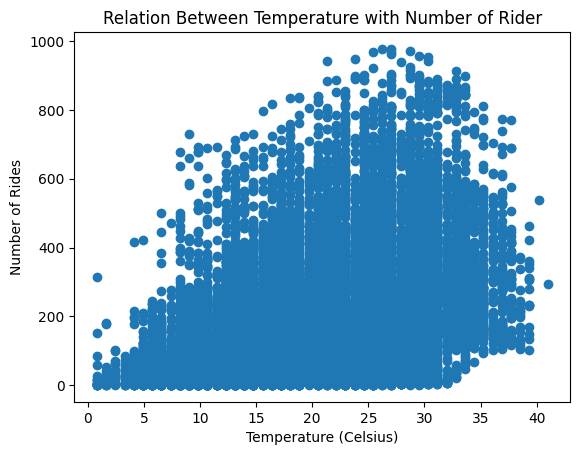

In [ ]:
# adds the title
plt.title('Relation Between Temperature with Number of Rider')

# plot the data
plt.scatter(bike_hour['atemp'], bike_hour['cnt'])

# Labelling axes
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Rides')
plt.show()

The plot shows that overall, people are like to rides on a moderate temperature feels like which is in range of 20-30 celsius degree.

## Conclusion

The bike-sharing data reveals several patterns in user behavior across different days, seasons, weather conditions, and times:

- In what day people most likely rent the bike?
  
  While bike rentals are relatively consistent throughout the week, rentals peak on Saturdays, likely as more casual riders opt to use bikes for leisure on weekends.

- In what season people most likely rent the bike and what season the bike is rarely rented?
  
  Fall is the most popular season for bike rentals, as the mild and pleasant weather encourages outdoor activities. Conversely, Spring sees the lowest rentals, potentially due to less favorable weather conditions.

- What the different between registered and casual customer to rides in season, day, and hour?

  - Seasonal Preferences: Both registered and casual riders prefer Fall for biking, with fewer rides recorded in Spring.
  - Day of the Week: Casual riders tend to rent bikes more on weekends, likely for recreational use. Registered riders, on the other hand, are more active on weekdays, possibly commuting to work.
  - Hourly Trends: Registered riders show spikes in usage in the morning, midday, and evening—aligning with typical work commute hours. Casual riders, however, have a steadier usage pattern from 10:00 to 17:00, suggesting leisurely or flexible usage during the day.

- How the weather situation that is most riders like to ride?

 Riders prefer clear weather conditions, with more rentals on clear days compared to cloudy ones, as clearer skies provide better visibility and a more enjoyable ride.

- How the relationship between number of rides and the temperatures feels like?
  
  Bike rentals are highest when temperatures are in the 20–30°C range, as this moderate temperature range is comfortable for outdoor activities.